<a href="https://colab.research.google.com/github/Gizem-kaya/Linear-SVM-Kernel-Trick/blob/main/SVM_Kernel_Trick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

Necessary library imports are done.

In [2]:
with open('C1__pts.txt') as f:
    lines = (line for line in f)
    c1 = np.loadtxt(lines, skiprows=4)

with open('C2__pts.txt') as f:
    lines = (line for line in f)
    c2 = np.loadtxt(lines, skiprows=4)
"""
label_column = np.zeros((100,), dtype=int)
c1 = np.insert(c1, 2, label_column, axis=1)

label_column.fill(1)
c2 = np.insert(c2, 2, label_column, axis=1)
"""

'\nlabel_column = np.zeros((100,), dtype=int)\nc1 = np.insert(c1, 2, label_column, axis=1)\n\nlabel_column.fill(1)\nc2 = np.insert(c2, 2, label_column, axis=1)\n'

Input files are read and c1, c2 arrays are created.

In [3]:
dataset = np.concatenate((c1, c2), axis=0)
#print(dataset)

A new dataset was created by combining the c1 and c1 arrays.

In [4]:
label = np.zeros((200,), dtype=int)
label[100:201] = 1
#print(label)

Label array is created.

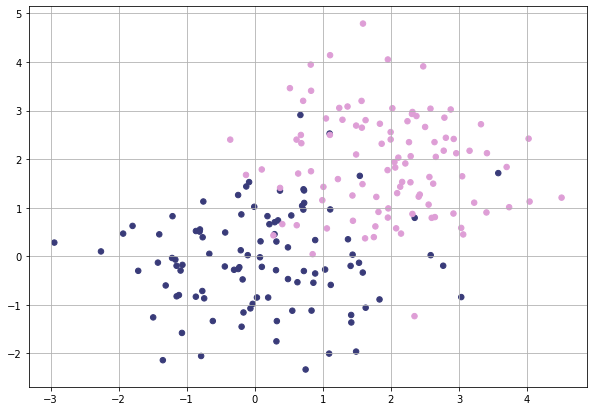

In [5]:
plt.figure(figsize=(10,7))
plt.scatter(dataset[:, 0], dataset[:, 1], c=label, s=30, cmap='tab20b')
plt.grid()
plt.show()

The dataset is shown by scatter plot.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.10)

a. Train and test sets are created from the dataset (the test set has 10 vectors).

In [7]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

SVM algorithm is used on the dataset for seperating c1 and c2.

In [8]:
print('Accuracy without Kernel Trick: ' + str(accuracy_score(y_pred, y_test)))

Accuracy without Kernel Trick: 0.8


As we can see, our algorithm work fine on our dataset. The accuracy is 0.8.

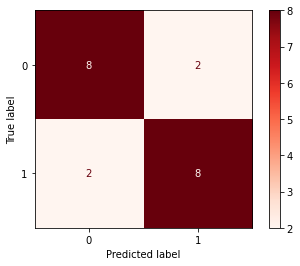

In [9]:
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Reds)  
plt.show()  

So, we have 4 FNs. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


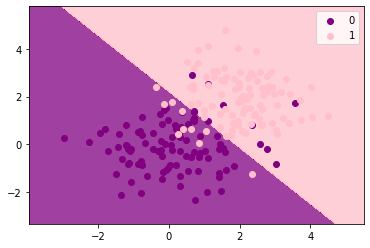

In [10]:
X_set, y_set = dataset, label
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('purple', 'pink')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = (ListedColormap(('purple', 'pink')))(i), label = j)
  
plt.legend()
plt.show()

b. By looking at this graph, we can see that it is impossible to classify the data set with linear classification. Wherever the hyperplane is drawn, the accuracy will not reach very high values. 

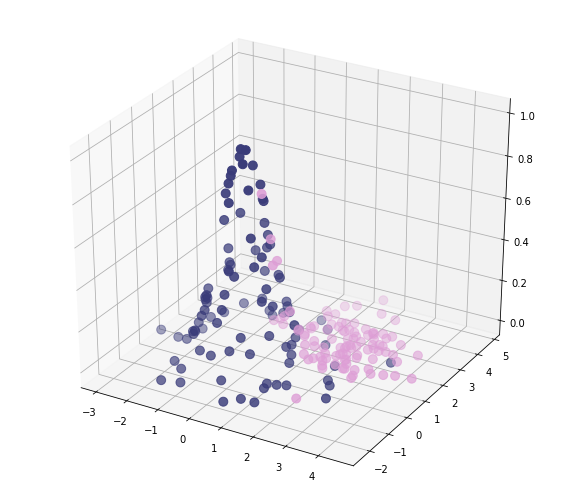

In [11]:
fig = plt.figure(figsize=(10,9))
fig = plt.subplot(projection='3d')
fig.scatter3D(dataset[:, 0], dataset[:, 1], np.exp(-(dataset ** 2).sum(1)), c=label, s=80, cmap='tab20b')
plt.show()

b. So, if we cannot make a highly accurate linear classification in 2D space, we can increase our accuracy by creating our data set in 3D space with the kernel trick and placing the 2D hyperplane in this space.

In [12]:
dataset_with_kernel_trick = copy.deepcopy(dataset)
dataset_with_kernel_trick = np.insert(dataset_with_kernel_trick, 2, np.exp(-(dataset ** 2).sum(1)), axis=1)

A new column is added for increasing the dimension of the dataset with the help of radial basis function.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(dataset_with_kernel_trick, label, test_size = 0.10)

a. Train and test sets are created from the dataset with kernel trick (the test set has 10 vectors).

In [14]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

SVM algorithm was run again.

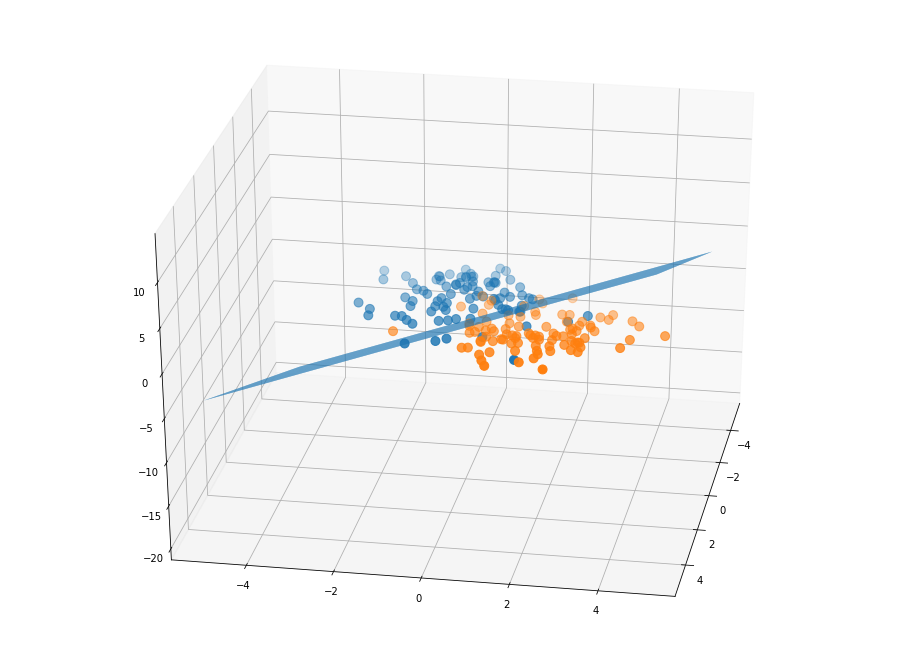

In [15]:
z = lambda x,y: (-classifier.intercept_[0]-classifier.coef_[0][0]*x -classifier.coef_[0][1]*y) / classifier.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure(figsize=(16,12))
ax  = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_train[y_train==0,0], X_train[y_train==0,1], X_train[y_train==0,2],'ob',s=80)
ax.scatter3D(X_train[y_train==1,0], X_train[y_train==1,1], X_train[y_train==1,2],'sr',s=80)
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 10)
plt.show()

After making the dataset we have in 3D, we plot a created 2D hyperplane.

In [16]:
print('Accuracy with Kernel Trick: ' + str(accuracy_score(y_pred, y_test)))

Accuracy with Kernel Trick: 0.95


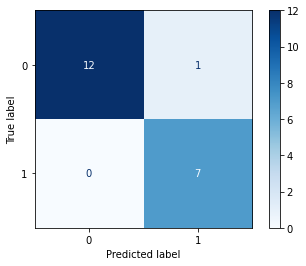

In [17]:
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()  

As a result, the accuracy value we reached with our test set of 10 vectors was 0.95. This value indicates that all vectors in the test set are placed in the correct class except one vector. The accuracy may be lower in other test sets because, as seen in the 3D plot, the SVM algorithm still cannot make a complete distinction. After performing linear classification on each two data sets a few times, I saw that the accuracy obtained on the data set with kernel trick was higher each time. Thus, we can say that it is preferable to use the kernel trick to distinguish between the two data classes we have.